# SVD review

**Singular Value Decomposition(SVD)** 
is a way of factorizing any $m\times n$ matrix $A$into singular vectors and singular values. SVD is more general than eigendecomposition, but can give us similar information. 

The SVD of a matrix A can be written as: 

$$\color{Blue}{A = UDV^{\top}}$$

Where $U$ is $m\times m$ orthonormal, $D$ is $m \times n$ diagonal matrix with non-negative singular values on the diagonals, and $V^T$ is $n \times n$ orthonormal. 
$(U^{\top} = U^{-1} \ \text{and} \ V^{\top} = V^{-1})$

The columns of $U$ are known as the **left-singular vectors**. The columns of $V$ are known as the **right-singular vectors**.

Geometrically, $U$ and $V$ can be thought of as rotation matrices, while $D$ is a scaling and projection matrix. 

![Singular Value Decomposition](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0208a.png)

# Moore Penrose Pseudoinverse

When solving linear least squares problems in the form $Xw = y$ ($X$ data matrix, $w$ coefficients, $y$ observations to predict). Often, $X$ is not square or directly invertible. 

The **Moore-Penrose pseudoinverse** $X^+$gives us a generalization of the inverse matrix that can help us solve linear least squares solutions, $w = X^+ y$ . 

A computationally simple and accurate of computing the pseudoinverse involves using the singular value decomposition. If $X = UDV^T$, then the pseudoinverse would be $$X^+ = VD^+ U^T$$ where $D^+$ of a diagonal matrix $D$ is obtained by taking the reciprocal of the nonzero diagonal entries, then transposing that matrix. 

Let us go through an example:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
%matplotlib inline
np.random.seed(42)

Matrix X: 
[[5.10462986 8.06658365]
 [2.79706404 5.62810995]
 [6.33173112 1.41805371]]



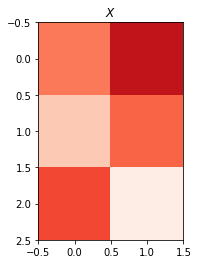

In [ ]:
matrix_X = np.random.uniform(size = [3, 2], low=1, high=10)
print("Matrix X: \n{}\n".format(matrix_X));
plt.imshow(matrix_X, cmap = 'Reds',vmin = 1, vmax = 10); plt.title(r'$X$');

Matrix U: 
[[-0.76437236 -0.2778561  -0.58183407]
 [-0.49390401 -0.3277583   0.80537776]
 [-0.41448007  0.90297867  0.11329514]] 

Matrix D: 
[12.38615677  4.39443085] 

Matrix V^T: 
[[-0.63843011 -0.7696798 ]
 [ 0.7696798  -0.63843011]]



Text(0.5, 1.0, 'Vt')

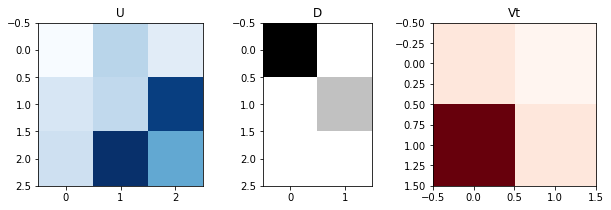

In [ ]:
## compute the svd of the matrix X
## CODE HERE
u, d, vt = np.linalg.svd(matrix_X, full_matrices=True)
## CODE END

print("Matrix U: \n{} \n\nMatrix D: \n{} \n\nMatrix V^T: \n{}\n".format(u, d, vt))

fig, ax = plt.subplots(1,3, figsize = (10,3))
ax[0].imshow(u, cmap = 'Blues', aspect = 'auto'); ax[0].set_title('U')
ax[1].imshow(np.concatenate((np.diag(d),np.zeros([1,2]))), cmap = 'Greys', vmin = 0); 
ax[1].set_title('D')
ax[2].imshow(vt, cmap = 'Reds'); ax[2].set_title('Vt')

D plus: 
[[0.08073529 0.         0.        ]
 [0.         0.22756075 0.        ]]

The Moore-Penrose pseudoinverse of Matrix X: 
[[-0.00926751 -0.0319488   0.17951963]
 [ 0.08786574  0.07830862 -0.10543029]]


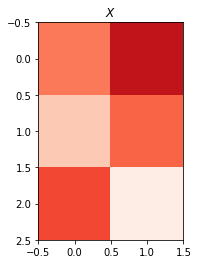

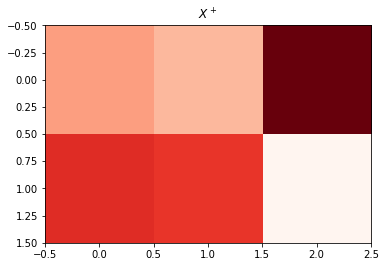

In [ ]:
## compute the pseudo-inverse of matrix D
## remember, you keep the nonzero singular values, then transpose the resulting matrix
## CODE HERE
dplus = np.concatenate([np.diag(1/d).T, np.zeros([2, 1])], axis=1)
## CODE END
print("D plus: \n{}\n".format(dplus))


## Then compute the pseudo-inverse of matrix X
## CODE HERE
Xplus = np.dot(vt.T,np.dot(dplus,u.T))
## CODE END
print("The Moore-Penrose pseudoinverse of Matrix X: \n{}".format(Xplus))

plt.imshow(matrix_X, cmap = 'Reds',vmin = 1, vmax = 10); plt.title(r'$X$');plt.show()
plt.imshow(Xplus,cmap = 'Reds'); plt.title(r'$X^+$'); plt.show();

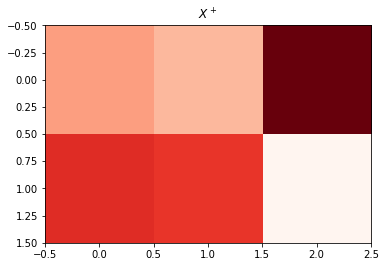

In [ ]:
# Double check with numpy's pseudoinverse function
np.linalg.pinv(matrix_X)
plt.imshow(np.linalg.pinv(matrix_X), cmap = 'Reds'); plt.title(r'$X^+$'); plt.show();

# Minimum Norm

When solving a system of linear equations of the form $Xw = y$, if X is full rank we have 3 scenerios:

1.  X is square. In this case, we can find $w = X^{-1}y$

2.  X is tall. In this case, we have an overdetermined system. We can find the least squares solution by minimizing the error or residual $\Vert Xw - y \Vert^2$
$$w = (X^T X)^{-1}X^T y = X^+ y$$ where we have the pseudo-inverse $$X^+ = (X^T X)^{-1}X^T $$

3. X is wide. In this case, we have an underdetermined system, and there are infinitely many solutions that can solve $Xw = y$.
In this scenerio, we are interested in the **minimum norm** solution:
$$\min_{w} \left \| w \right \| ^2 \text{ s.t. } Xw = y$$
In lecture, we showed that the pseudo-inverse gives us our minimum norm solution:
$$w = X^T(X X^T)^{-1} y = X^+ y$$
where we have pseudo-inverse
$$X^+ = X^T(X X^T)^{-1} $$

## Underdetermined System of Equations
Let us have some practice solving underdetermined systems.

Starting with the simplest case: n = 1, d = 2. 


X: [x1 1] :  [2 1]
y =  1
We want the solution to [[2 1]]*w = 1


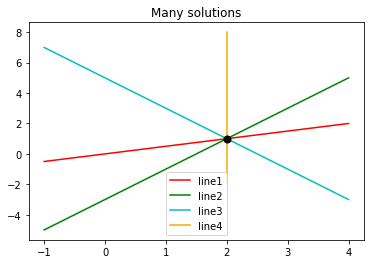

In [ ]:
X = np.array([2,1])
print('X: [x1 1] : ', X)
y = 1
print('y = ',y)
print('We want the solution to [{}]*w = {}'.format(X,y))
plt.scatter(X[0],X[1], zorder = 5, linewidths = 2, c = 'k')

x_range = np.linspace(-1,4,10)
y1 = x_range*1/2
plt.plot(x_range, y1, c = 'r', label = 'line1')
y2 = x_range*2-3
plt.plot(x_range, y2, c = 'g', label = 'line2')
y3 = x_range*-2+5
plt.plot(x_range, y3, c = 'c', label = 'line3')
y4 = x_range*2
plt.plot([2]*10,y4, c = 'orange', label = 'line4')
plt.legend()
plt.title('Many solutions')

X = np.expand_dims(X, axis = 0)

In [ ]:
## Compute the minimum norm solution for w. You can use the pseudo-inverse
## Your solution for w should be in wstar
## Start Code
u, d, vt = np.linalg.svd(X)

dplus = np.zeros(X.shape)
dplus[0] = 1/d
dplus = dplus.T

Xstar = vt.T @ dplus @ u.T
wstar = Xstar*1
## End code

Equation: 1 = X*w = x1*[0.6] + [-0.2]


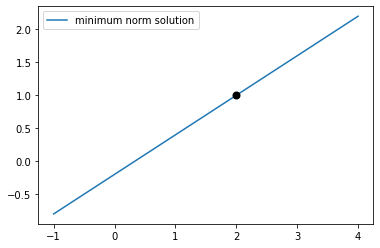

In [ ]:
plt.scatter(2,1, zorder = 5, linewidths = 2, c = 'k')

x_lines = np.vstack((x_range, np.ones(x_range.shape))).T
ys = x_lines@wstar
plt.plot(x_range, ys, label = 'minimum norm solution')
plt.legend()
print('Equation: 1 = X*w = x1*{} + {}'.format(wstar[0],wstar[1]))

## Pseudoinverse to fit Overdetermined system

We can use pseudoinverses to fit many points. 
With a set of x and y, we want to find the line y = mx+b that minimises the error between the fit and actual data points.
$$\min_w ||Xw-y||$$

Let us use this system of equation: 
$$\boldsymbol{Xw} = \boldsymbol{y} \Leftrightarrow \begin{bmatrix} 0 & 1 \\\\ 1 & 1 \\\\ 2 & 1 \\\\ 3 & 1 \\\\ 3 & 1 \\\\ 4 & 1 \end{bmatrix} \begin{bmatrix} m \\\\ b \end{bmatrix} = \begin{bmatrix} 2 \\\\ 4 \\\\ 0 \\\\ 2 \\\\ 5 \\\\ 3 \end{bmatrix}$$
This can also be represented as a system of equations: 
$$\begin{cases} 0m + 1b = 2 \\\\ 1m + 1b = 4 \\\\ 2m + 1b = 0 \\\\ 3m + 1b = 2 \\\\ 3m + 1b = 5 \\\\ 4m + 1b = 3 \end{cases}$$

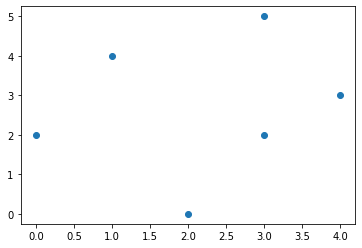

In [ ]:
X = np.array([[0, 1], [1, 1], [2, 1], [3, 1], [3, 1], [4, 1]])
y = np.array([[2], [4], [0], [2], [5], [3]])
plt.scatter(X[:,0],y)

In [ ]:
## Compute the pseudoinverse of X and find w
## CODE HERE

# soln 0
X_plus = np.linalg.pinv(X)
w = X_plus.dot(y)
# soln 1
u, d, vt = np.linalg.svd(X)
dplus = np.zeros(X.shape)
dplus[:min(X.shape), :min(X.shape)] = np.diag(1/d)
dplus = dplus.T
w = vt.T @ dplus @ u.T @ y
# soln 2
w = np.linalg.inv(X.T@X)@X.T@y


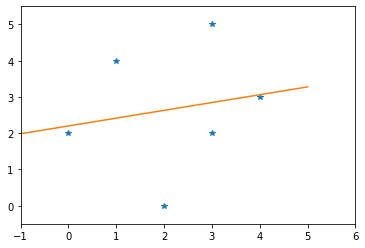

In [ ]:
x_range = np.linspace(-1, 5, 1000)
ys = w[0]*x_range + w[1]

plt.plot(X[:, 0], y, '*')
plt.plot(x_range, ys)
plt.xlim(-1., 6)
plt.ylim(-0.5, 5.5)

plt.show()